In [1]:
#Linear Regression
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split

#%matplotlib inline


In [2]:
from pyforest import*
lazy_imports()

['import keras',
 'import seaborn as sns',
 'import sklearn',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.preprocessing import OneHotEncoder',
 'import datetime as dt',
 'import tensorflow as tf',
 'from dask import dataframe as dd',
 'import plotly as py',
 'import pandas as pd',
 'import bokeh',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.impute import SimpleImputer',
 'from xlrd import open_workbook',
 'from sklearn.linear_model import Ridge',
 'from sklearn import metrics',
 'from PIL import Image',
 'import imutils',
 'from sklearn.model_selection import cross_val_score',
 'import matplotlib.pyplot as plt',
 'from sklearn.model_selection import GridSearchCV',
 'import skimage',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import os',
 'import gensim',
 'import fastai',
 'from openpyxl import load_workbook',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.preprocessing import RobustScaler',
 'from f

In [3]:
data = pd.read_csv('Automobile.csv')
data

<IPython.core.display.Javascript object>

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,usa


In [4]:
data.shape

(398, 9)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

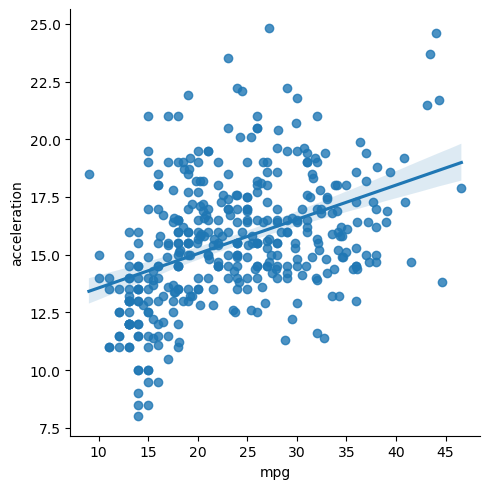

In [5]:
sns.lmplot(x='mpg',y='acceleration',data=data)
plt.show()

In [6]:
data['mpg'].corr(data['acceleration'])

0.42028891210165054

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

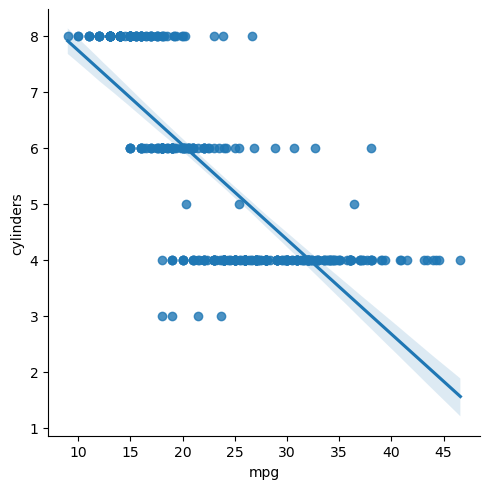

In [7]:
sns.lmplot(x='mpg',y='cylinders',data=data)
plt.show()

In [8]:
data['mpg'].corr(data['cylinders'])

-0.7753962854205545

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

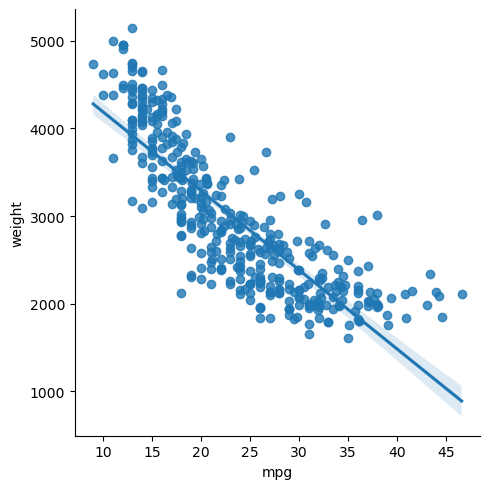

In [9]:
sns.lmplot(x='mpg',y='weight',data=data)
plt.show()

In [10]:
data['mpg'].corr(data['weight'])

-0.8317409332443345

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,103.271357,39.410476,25.0,75.000,92.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [12]:
df=data.drop('name',axis=1)

In [13]:
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,usa
1,15.0,8,350.0,165,3693,11.5,70,usa
2,18.0,8,318.0,150,3436,11.0,70,usa
3,16.0,8,304.0,150,3433,12.0,70,usa
4,17.0,8,302.0,140,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,usa
394,44.0,4,97.0,52,2130,24.6,82,europe
395,32.0,4,135.0,84,2295,11.6,82,usa
396,28.0,4,120.0,79,2625,18.6,82,usa


In [14]:
df = pd.get_dummies(df,columns=['origin'])  #Convert categorical data to dummy variable
df


<IPython.core.display.Javascript object>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130,3504,12.0,70,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,0,0,1
394,44.0,4,97.0,52,2130,24.6,82,1,0,0
395,32.0,4,135.0,84,2295,11.6,82,0,0,1
396,28.0,4,120.0,79,2625,18.6,82,0,0,1


In [15]:
df.isna().sum()

mpg              0
cylinders        0
displacement     0
horsepower       0
weight           0
acceleration     0
model_year       0
origin_europe    0
origin_japan     0
origin_usa       0
dtype: int64

In [16]:
df.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
model_year         int64
origin_europe      uint8
origin_japan       uint8
origin_usa         uint8
dtype: object

<IPython.core.display.Javascript object>

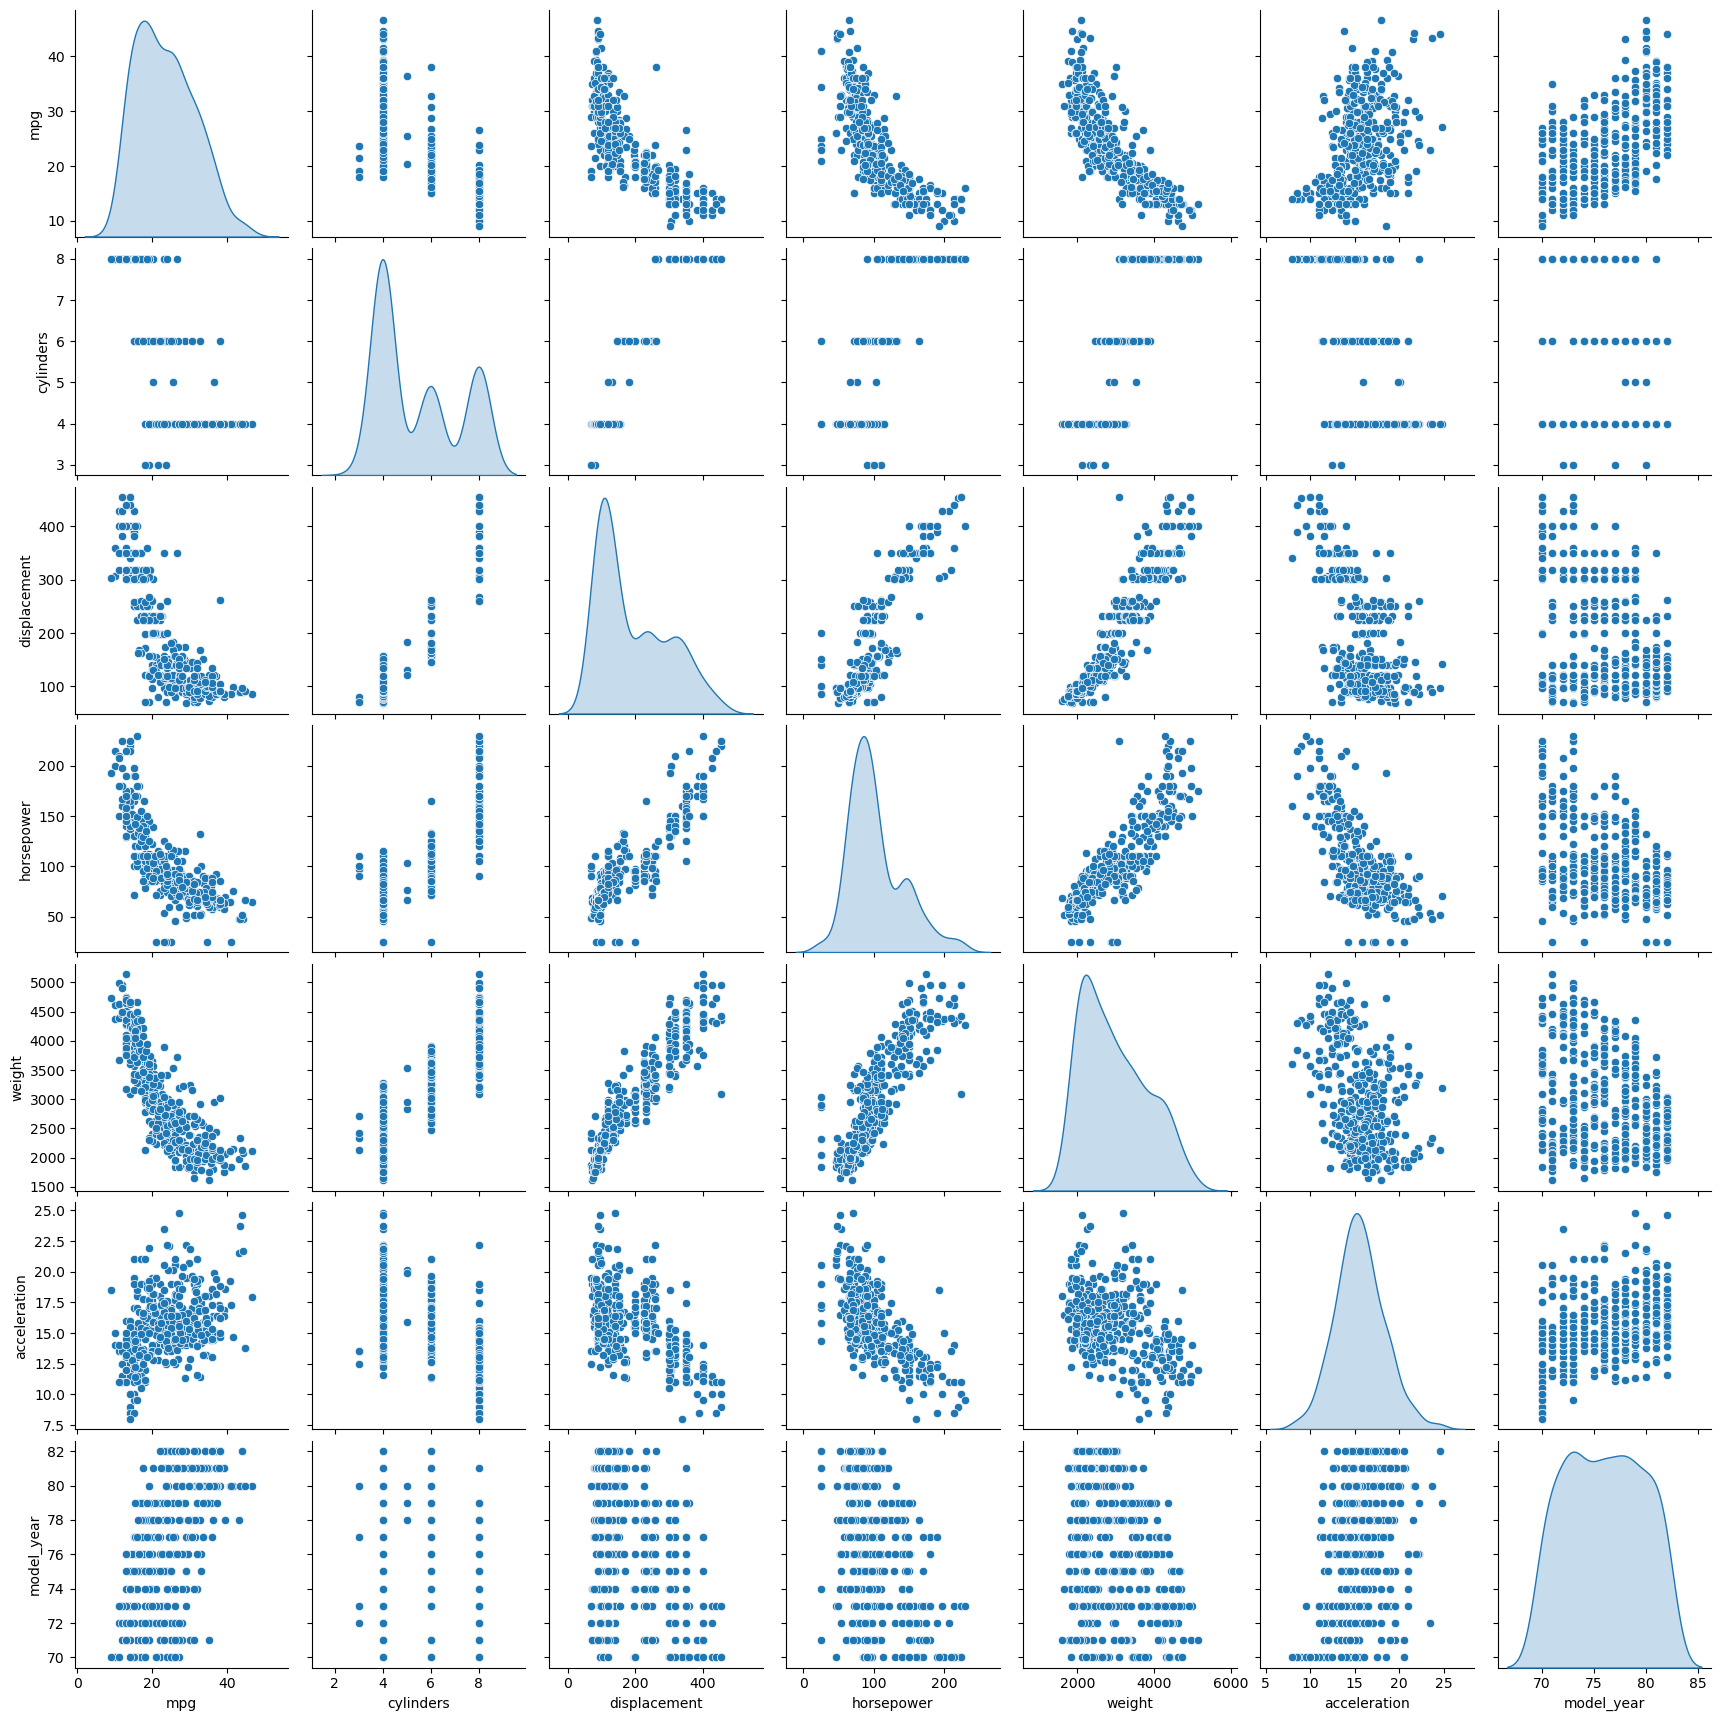

In [17]:
attr_select=df.iloc[:,0:7]
sns.pairplot(attr_select,diag_kind='kde')

In [18]:
#Getting Dependent and Independent variables
X=df.drop(['mpg','origin_europe'],axis=1)
y = df[['mpg']]


In [19]:
#split data into 70:30 ratio train and test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=1)

<IPython.core.display.Javascript object>

In [20]:
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

<IPython.core.display.Javascript object>

LinearRegression()

In [21]:
regression_model.coef_

array([[-0.39214906,  0.0285379 , -0.01547749, -0.00750375,  0.08694824,
         0.84020672, -0.59958357, -2.99760363]])

In [22]:
for indx,col_name in enumerate(X_train.columns):print("Coefficient of {} is {} ".format(col_name,regression_model.coef_[0][indx]))

Coefficient of cylinders is -0.3921490648018917 
Coefficient of displacement is 0.028537896650905056 
Coefficient of horsepower is -0.015477493127750173 
Coefficient of weight is -0.0075037461671186925 
Coefficient of acceleration is 0.08694823803021498 
Coefficient of model_year is 0.8402067242947967 
Coefficient of origin_japan is -0.5995835698002555 
Coefficient of origin_usa is -2.997603630233976 


In [23]:
intercept = regression_model.intercept_[0]               #y-intercept
print("Intercept of the model is {}".format(intercept))

Intercept of the model is -19.083556480951994


In [24]:
#checking score
regression_model.score(X_train,y_train)

0.8136587950629586

In [25]:
regression_model.score(X_test,y_test)

0.8449043465368329

In [26]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
174,6,171.0,97,2984,14.5,75,0,1
359,4,141.0,80,3230,20.4,81,0,0
250,8,318.0,140,3735,13.2,78,0,1
274,5,131.0,103,2830,15.9,78,0,0
283,6,232.0,90,3265,18.2,79,0,1
...,...,...,...,...,...,...,...,...
382,4,108.0,70,2245,16.9,82,1,0
39,8,400.0,175,4464,11.5,71,0,1
171,4,134.0,96,2702,13.5,75,1,0
271,4,156.0,105,2745,16.7,78,0,1


In [27]:
regression_model.predict(X_test)

array([[20.8296842 ],
       [27.72687984],
       [20.34719877],
       [26.78298069],
       [24.25282106],
       [15.92023021],
       [29.55111449],
       [34.50680146],
       [16.93431802],
       [10.64655228],
       [30.24391438],
       [16.38170111],
       [22.33269212],
       [27.39752369],
       [36.46215829],
       [23.46185974],
       [11.07005236],
       [20.0794101 ],
       [ 9.13630599],
       [33.05611798],
       [26.03954693],
       [32.30817843],
       [20.75138909],
       [25.08686781],
       [25.69693943],
       [29.9327574 ],
       [32.55321612],
       [32.49737416],
       [15.08024979],
       [30.13874314],
       [27.25315058],
       [11.25849799],
       [21.26256791],
       [28.66317928],
       [24.82427171],
       [13.76140858],
       [26.3979828 ],
       [ 9.42442861],
       [31.58720375],
       [23.76363206],
       [23.91452895],
       [24.36493151],
       [20.99347868],
       [34.05719746],
       [25.96093875],
       [22

In [28]:
y_test

,mpg
174,18.0
359,28.1
250,19.4
274,20.3
283,20.2
...,...
382,34.0
39,14.0
171,24.0
271,23.2


In [29]:
#Logistic Regression

In [30]:
data1 = pd.read_csv('diabetes.csv')
data1.head()

<IPython.core.display.Javascript object>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
df = data1
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [32]:
#df.shape
df.isnull().values.any()


False

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

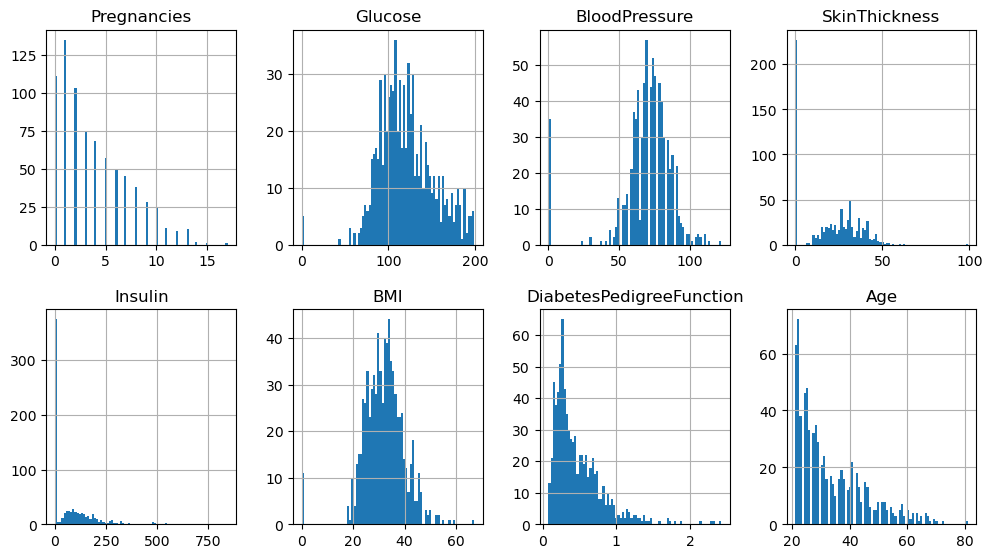

In [33]:
columns =list(df)[0:-1]
df[columns].hist(bins=80,figsize=(12,50),layout=(14,4))

In [34]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

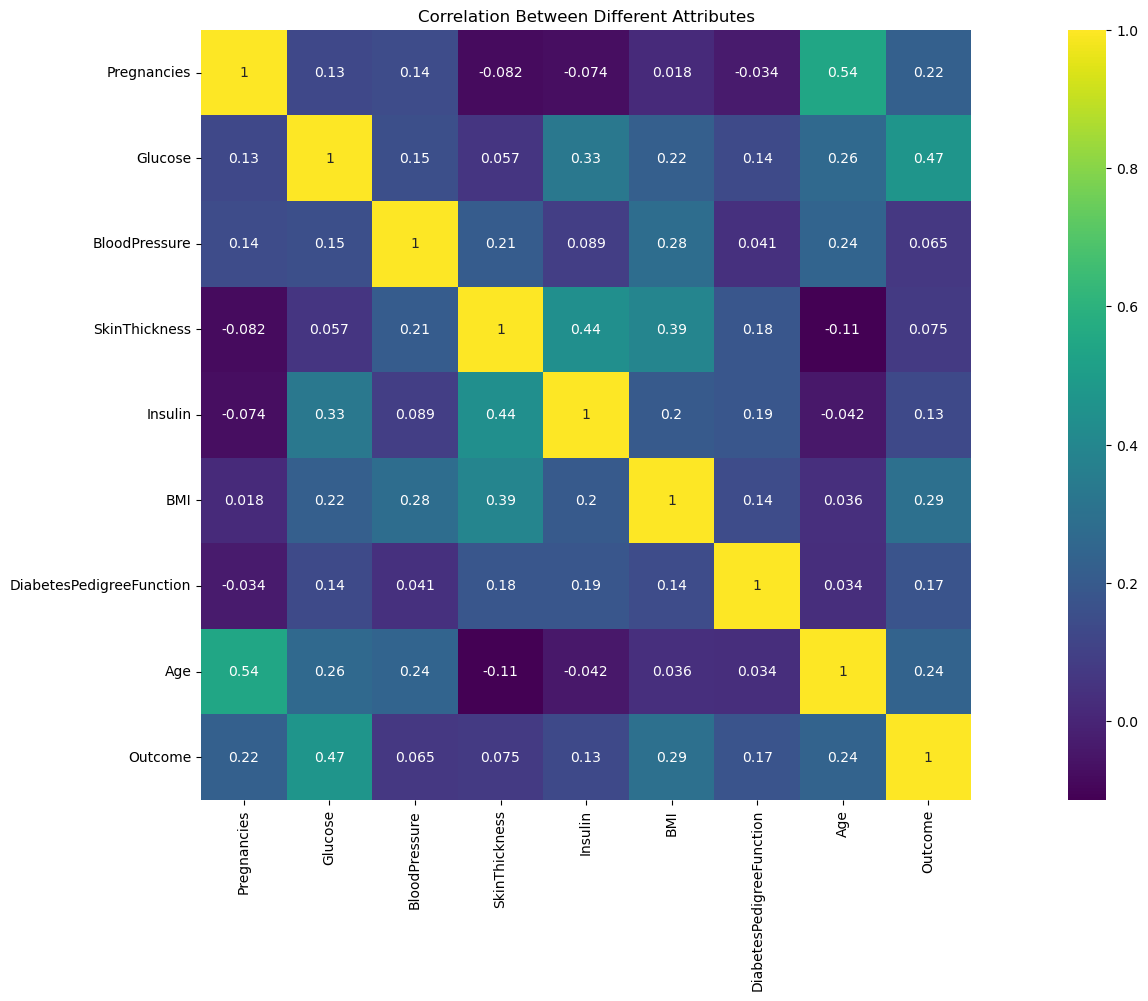

In [35]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title('Correlation Between Different Attributes')
plt.show()

<IPython.core.display.Javascript object>

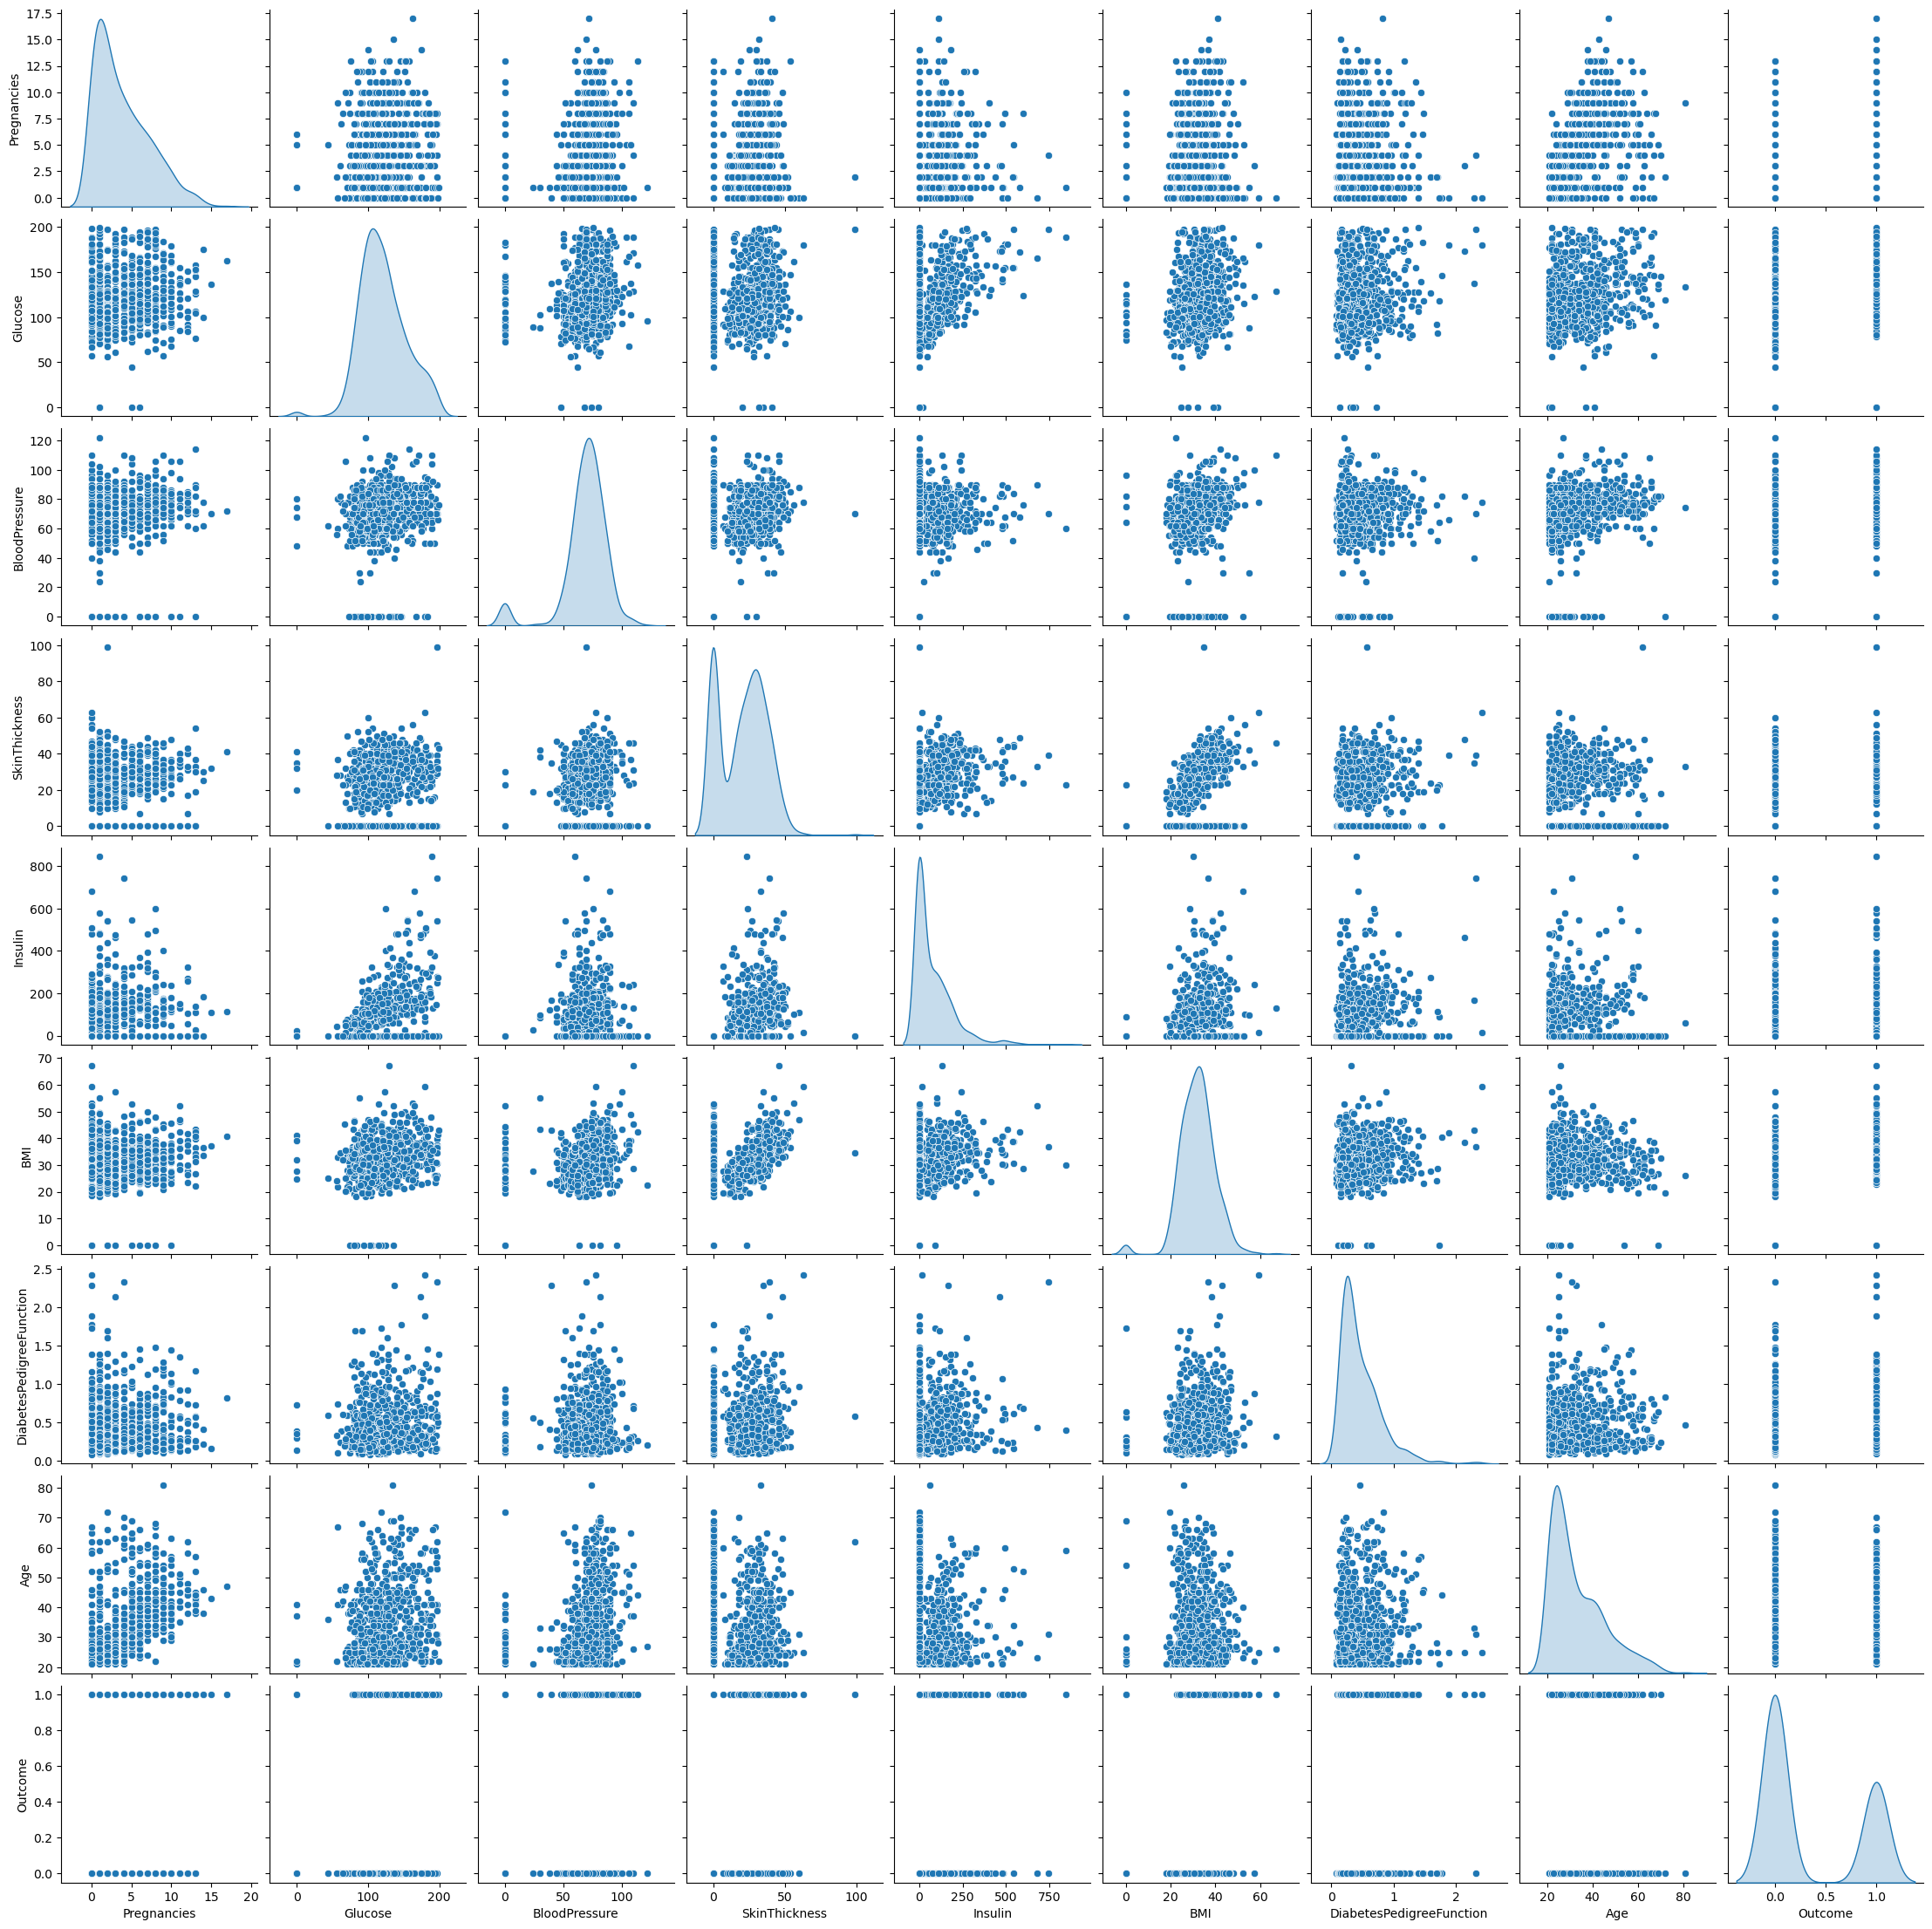

In [36]:
sns.pairplot(df,diag_kind='kde')

In [37]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome',axis=1)
Y = df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


In [39]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [40]:
print('{}% data is present in training dataset'.format((len(x_train)/len(df)*100)))
print('{}% data is present in testing dataset'.format((len(x_test)/len(df)*100)))

69.921875% data is present in training dataset
30.078125% data is present in testing dataset


In [41]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [42]:
from sklearn.impute import SimpleImputer
replace=SimpleImputer(missing_values=0,strategy="mean")
cols=x_train.columns

x_train = pd.DataFrame(replace.fit_transform(x_train))
x_test = pd.DataFrame(replace.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [44]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model= LogisticRegression(solver="liblinear")
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [45]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [46]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7.0,136.0,74.0,26.00,135.000000,26.0,0.647,51.0
1,1.0,151.0,60.0,30.16,150.137405,26.1,0.179,22.0
2,6.0,109.0,60.0,27.00,150.137405,25.0,0.206,27.0
3,3.0,61.0,82.0,28.00,150.137405,34.4,0.243,46.0
4,1.0,116.0,78.0,29.00,180.000000,36.1,0.496,25.0


In [47]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [48]:
model_score=model.score(x_test,y_test)
(model_score)

0.7792207792207793

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

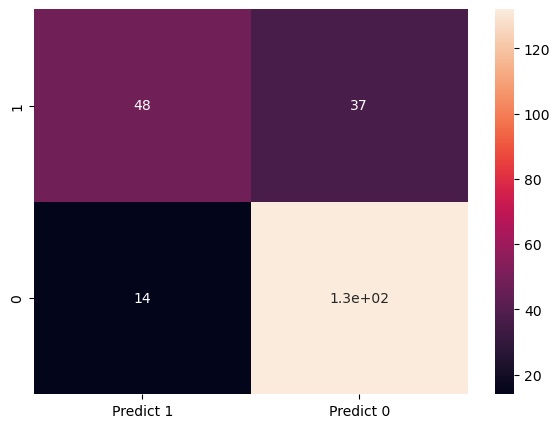

In [49]:
cm = metrics.confusion_matrix(y_test,y_predict,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)


In [50]:
#Naive Bayes Classfier

In [51]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [52]:
train_prediction = model.predict(x_train)
train_prediction

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [53]:
from sklearn import metrics
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,train_prediction)))

Model Accuracy: 0.7393


In [54]:
test_prediction = model.predict(x_test)
test_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [55]:
from sklearn import metrics
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,test_prediction)))

Model Accuracy: 0.7706


Confusion Matrix


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

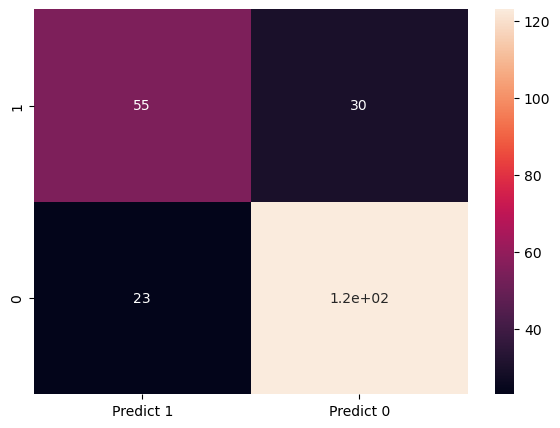

In [56]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test,test_prediction,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

In [57]:
from sklearn.metrics import classification_report
print("Classfication Report")
print(metrics.classification_report(y_test,test_prediction,labels=[1,0]))

Classfication Report
              precision    recall  f1-score   support

           1       0.71      0.65      0.67        85
           0       0.80      0.84      0.82       146

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

